# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (help adhere to good coding practices)
%load_ext nb_black

# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# import libraries for plots and data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style="darkgrid")

# Library to split data
from sklearn.model_selection import train_test_split


# To build model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

**Loading The Data**

In [2]:
# Loading the dataset INNHotelsGroup.csv
data = pd.read_csv("INNHotelsGroup.csv")

# Viewing the first  5 rows of the dataset.
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [3]:
# Viewing 10 random sample of the data
data.sample(
    10, random_state=1
)  # setting the random_state will ensure we get the same results every time

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
30392,INN30393,1,0,1,0,Not Selected,0,Room_Type 1,53,2018,9,11,Online,0,0,0,94.32,0,Not_Canceled
6685,INN06686,2,0,1,2,Meal Plan 1,0,Room_Type 1,63,2018,4,22,Online,0,0,0,105.30,1,Canceled
8369,INN08370,2,0,2,3,Meal Plan 1,0,Room_Type 4,55,2018,9,11,Online,0,0,0,106.24,0,Not_Canceled
2055,INN02056,2,0,0,2,Not Selected,0,Room_Type 1,53,2017,12,29,Online,0,0,0,81.00,1,Not_Canceled
10969,INN10970,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
24881,INN24882,2,0,3,7,Meal Plan 1,0,Room_Type 2,231,2018,8,1,Online,0,0,0,81.82,2,Canceled
28658,INN28659,2,0,0,3,Meal Plan 2,0,Room_Type 1,71,2018,5,10,Offline,0,0,0,126.00,1,Not_Canceled
20853,INN20854,2,0,1,2,Meal Plan 1,0,Room_Type 1,66,2017,10,9,Offline,0,0,0,75.00,0,Canceled
8501,INN08502,2,0,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,77.55,1,Not_Canceled
1942,INN01943,2,0,0,2,Meal Plan 1,0,Room_Type 1,63,2018,8,9,Online,0,0,0,144.90,2,Not_Canceled


<IPython.core.display.Javascript object>

**Observation:**
* The above rows in this dataset shows the bookings of customers/guests that booked thier arrival or arrived at the INN hotel  in the year 2017 and 2018 (less than 6 years ago).

In [4]:
# Copying data to another variable to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

**Checking the shape of the dataset.**

In [5]:
# Checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 36275 rows and 19 columns.


<IPython.core.display.Javascript object>

**Observations:**
* There are 36275 rows and 19 columns in this dataset.

**Checking the data types of the columns in the dataset**

In [6]:
# Returns information about the DataFrame including the data types of each column and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

**Observations:**
* There are **14 numerical(integer or float) data type columns**.The **no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights,required_car_parking_space, lead_time, arrival_year, arrival_month, arrival_date, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled and  no_of_special_requests** are integer(int64) data type columns.The **avg_price_per_room** is a float(float64) data type column.
* There are **5 object data type columns**.The **Booking_ID, type_of_meal_plan, room_type_reserved, market_segment_type ,and booking_status** are **object data type** columns.
* There seems to be non-null(or no missing) values in the dataset.

**Missing Values Check**

In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

**Observations:**
* There are no missing values in this dataset.   

**Duplicates Entry Check**

In [8]:
# Checking for duplicate values
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

**Observations:**
* There are no duplicated entries in this dataset.  

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Statistical Summary of the Data

In [9]:
# Returns the statistical summary of the numerical columns the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


<IPython.core.display.Javascript object>

**Observations:**
* The number of days(lead_time)  between the date of booking and the arrival date of guests/customers in this dataset ranges from 0 days to 443 days(approximately 1 year 2 months).This shows that there are some guests that book or make reservations in the hotel the same day they arrive at the hotel and some guests make their reservations upto a year prior to their arrival at the hotel.
* Number of previous hotel bookings in this dataset canceled by customers prior to their current booking ranges from 0 to 13 bookings.
* Number of previous hotel bookings in this dataset not canceled by customers prior to their current booking ranges from 0 to 58 bookings.
* The average price of the hotel rooms per day of the reservation ranges from 0 to 540euros.

In [10]:
# Checking for unique values in Booking_ID column
df.Booking_ID.nunique()

36275

<IPython.core.display.Javascript object>

* Since all the values in Booking_ID column are unique we can drop it.

In [11]:
# Dropping the Booking_ID column
df.drop(["Booking_ID"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
# Making a list of all categorical variables
cat_col = [
    "required_car_parking_space",
    "arrival_year",
    "arrival_month",
    "repeated_guest",
    "no_of_special_requests",
    "type_of_meal_plan",
    "room_type_reserved",
    "arrival_year",
    "arrival_month",
    "market_segment_type",
    "booking_status",
    "no_of_adults",
    "no_of_children",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

0    35151
1     1124
Name: required_car_parking_space, dtype: int64
----------------------------------------
2018    29761
2017     6514
Name: arrival_year, dtype: int64
----------------------------------------
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
----------------------------------------
0    35345
1      930
Name: repeated_guest, dtype: int64
----------------------------------------
0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64
----------------------------------------
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_res

<IPython.core.display.Javascript object>

**Observations:**
* There are more(majority) of customers in this dataset that do not require a car parking space than those that require a car parking space.
* This dataset have hotel bookings of customers that booked their arrival or arrived  at the hotel in the year 2017 and 2018.
* Customers in this dataset booked their arrival at the hotel throughout the month of January to December.Most customers chosed the month of October to arrive at the hotel.
* There are more hotel bookings in this dataset from guests that **are not repeated** than are hotel bookings from  repeated guests.
* There are more guests in this dataset that ended up **not cancelling thier hotel bookings** than those that ended up cancelling thier hotel bookings.
* There are **4 unique types of meal plan booked by customers** in this dataset.The**Meal Plan 1,Not Selected,Meal Plan 2, and Meal Plan 3**.The **meal plan 1** is the most selected(the top) meal plan in this dataset booked by customers.
* There are **7 unique types of rooms reserved by customers** in this dataset.**The Room_Type 1,2,3,4,5,6,and 7**.The **most(top) reserved type of room** in this dataset by customers is **the Room_Type 1**.
* There are **5 unique market segment designation** in this dataset:**Online, Offline, Corporate, Complementary, and Aviation**.The top market segment designation where customers come from is the **Online market segment designation .  
* The number of adults(No_of_adults) of hotel bookings in this dataset ranges from 0 to 4 adults.Majority of hotel bookings in this dataset are booked with the number of 2 adults.
* The number of children(No_of_children) of hotel bookings in this dataset ranges from 0 to 10 children. Majority of hotel bookings in this dataset are booked with no children(that is 0children).

## Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="autumn"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="dashed"
    )  # Add mean to the histogram (broken green line)
    ax_hist2.axvline(
        data[feature].median(), color="red", linestyle="-"
    )  # Add median to the histogram (red line)

<IPython.core.display.Javascript object>

#### Avg_price_per_room:

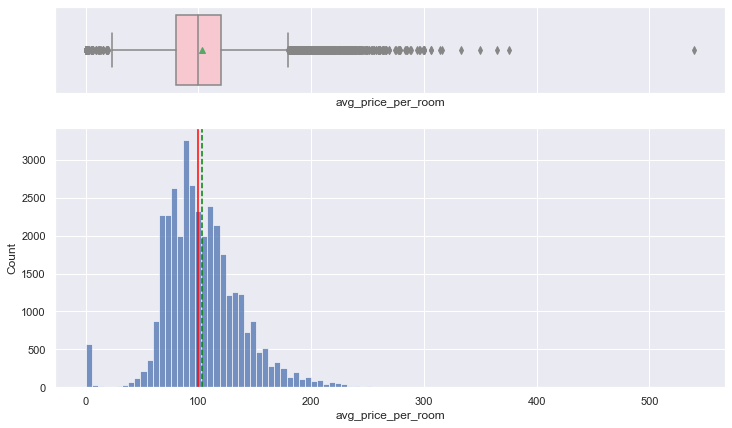

<IPython.core.display.Javascript object>

In [14]:
# Creating a boxplot and histogram for the avg_price_per_room variable
# inorder to see the shape its distribution
histogram_boxplot(df, "avg_price_per_room", bins=100)

**Observations:**
* There are outliers on both sides.
* The mean of avg_price_per_room is ~ 103euros and median is ~ 100euros.
* There are observations that go above 500euros.

#### Lead_time:

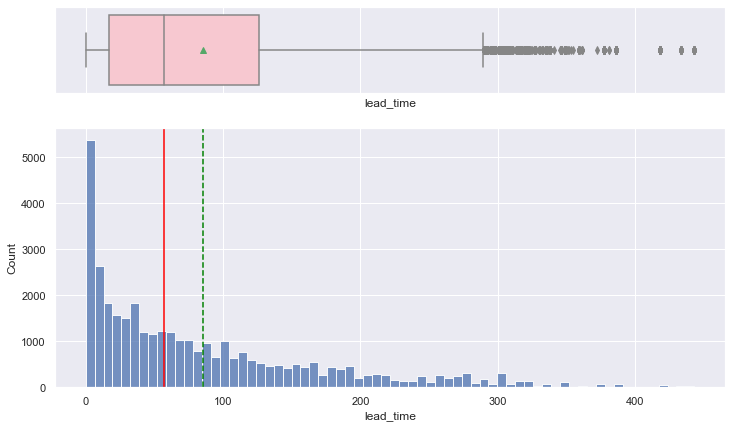

<IPython.core.display.Javascript object>

In [15]:
# Creating a boxplot and histogram for the lead_time variable
# inorder to see the shape its distribution
histogram_boxplot(df, "lead_time")

**Observations:**
* The distribution of lead_time variable is right-skewed.
* The boxplot of lead_time variable shows that there are alot of outliers towards the right end.
* Most customers/guests make their hotel reservations less than 10days prior to their arrival date at the hotel.
* We have observations(though few) of customers that make their hotel reservations or bookings above 400days(at least 1 year) prior to their arrival date at the hotel.

#### No_of_previous_cancellations	

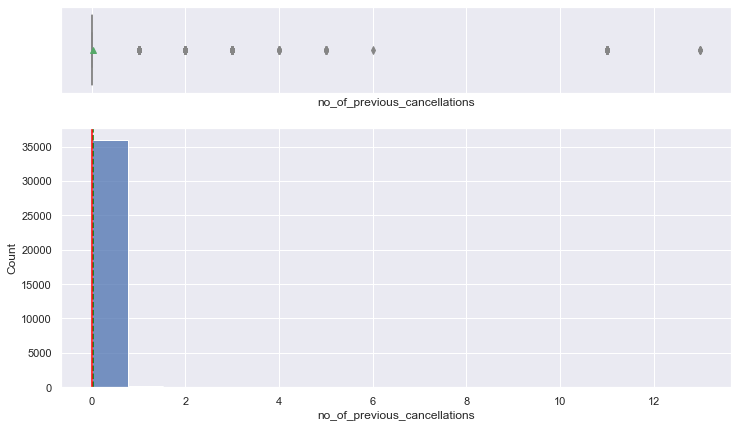

<IPython.core.display.Javascript object>

In [16]:
# Creating a boxplot and histogram for the no_of_previous_cancellations variable
# inorder to see the shape its distribution
histogram_boxplot(df, "no_of_previous_cancellations")

**Observations:**
* There are outliers towards the right end in this variable.
* Most customers have no previous hotel bookings cancellation prior to their current booking.
* However,there are observations of guests that cancelled more than 10 hotel bookings prior to their current booking.

#### No_of_previous_bookings_not_canceled	

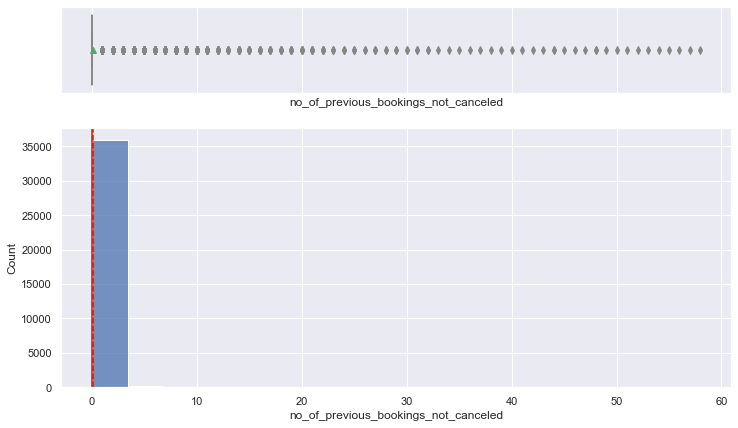

<IPython.core.display.Javascript object>

In [17]:
# Creating a boxplot and histogram for the no_of_previous_bookings_not_canceled variable
# inorder to see the shape its distribution
histogram_boxplot(df, "no_of_previous_bookings_not_canceled")

**Observations:**
* There are outliers towards the right in this variable.
* Majority of customers/guests in this dataset have no previous bookings that were  not cancelled prior to their current booking.
* We have observations of customers having more than 50 previous hotel bookings not cancelled prior to their current booking in this dataset.

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=40, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="tab10",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

#### Arrival_month

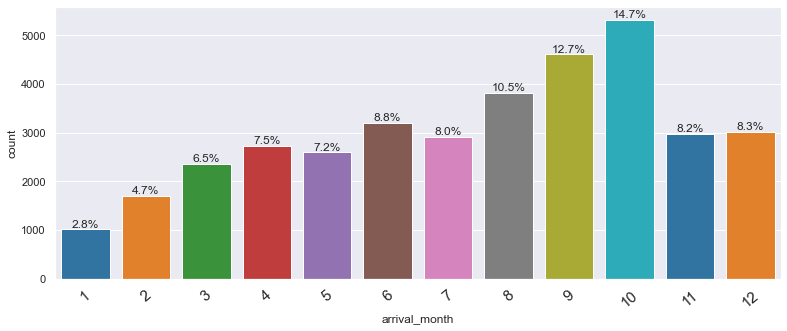

<IPython.core.display.Javascript object>

In [19]:
# Creating a labeled barplot of arrival_month variable
labeled_barplot(df, "arrival_month", perc=True)

**Observations:**
* The top 5 months that guests booked their arrival or arrived at the hotel  are:
  - **October(14.7%)**
  - **September(12.7%)**
  - **August(10.5% )**
  - **June(8.8% ) and**
  - **December(8.3%)**.

* The month of october(10th month) is hence the month in which most(majority) customers booked their arrival or arrived at the hotel.
* The month in which the least number customers(2.8%) book their or arrived arrival at the hotel,is the month of January.


#### Arrival_year

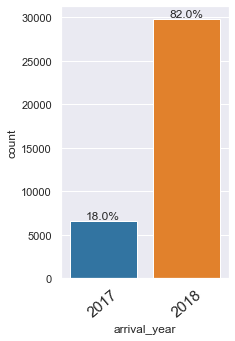

<IPython.core.display.Javascript object>

In [20]:
# Creating a labeled barplot of arrival_year variable
labeled_barplot(df, "arrival_year", perc=True)

**Observations:**
* The are more(82.0%) customers that booked their arrival or arrived at the hotel in the year 2018 than the year 2017(18.0% of customers).

#### No_of_adults

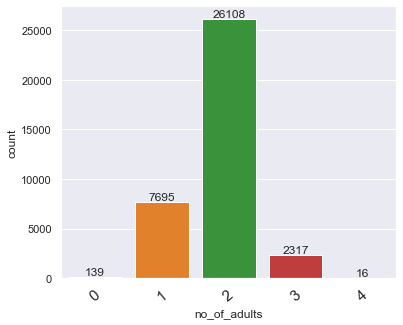

<IPython.core.display.Javascript object>

In [21]:
# Creating a labeled barplot of no_of_adults variable
labeled_barplot(df, "no_of_adults", perc=False)

**Observations:**
* Majority of customers in this dataset booked the hotel or made reservations for 2  adults.
* Few or the least number of customers or guests(16) in this dataset booked the hotel or made reservations for 4 adults.

#### No_of_children

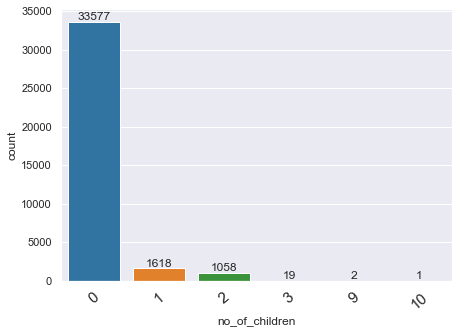

<IPython.core.display.Javascript object>

In [22]:
# Creating a labeled barplot of no_of_children variable
labeled_barplot(df, "no_of_children", perc=False)

**Observations:**
* A large majority of customers(~92.6%) in this dataset booked the hotel or make reservations with no(0) children.
* Very few or the least number of customers or guests in this dataset booked the hotel or made reservations with 3 or more children.

#### Market_segment_type

**Q.2.Which market segment do most of the guests come from?**

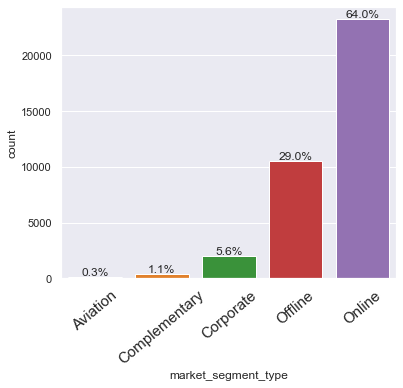

<IPython.core.display.Javascript object>

In [23]:
# Creating a labeled barplot of Market_segment_type variable
labeled_barplot(df, "market_segment_type", perc=True)

**Observations:**
* Most(64.0%) of the guests in this dataset come from the **Online market segment**.
* 29.0% of the guests come from the **Offline market segment**.
* 5.6% of the guests come from the **Corporate market segment**.
* 1.1% of the guests come from the **Complementary market segment** and
* 0.3%(which represent the least number) of the guests come from the **Aviation market segment**.

#### No_of_weekend_nights

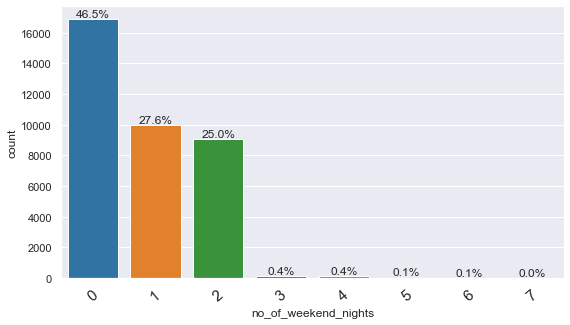

<IPython.core.display.Javascript object>

In [24]:
# Creating a labeled barplot of no_of_weekend_nights variable
labeled_barplot(df, "no_of_weekend_nights", perc=True)

**Observations:**
* Most(46.5% of) guests did not stay or book to stay at the hotel on weekend(Saturday or Sunday) nights.
* 27.6% of guests stayed or booked to stay at the hotel for 1 weekend night and 25.0% of guests stayed or booked to stay at the hotel for 2 weekend nights.
* Very few(less than  2% of) guests in this dataset stayed or booked to stay at the hotel for 3 and more weekend nights. 

#### No_of_week_nights

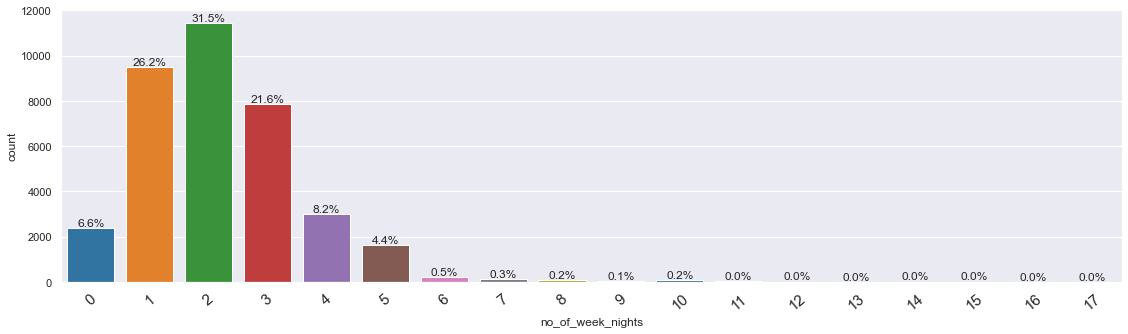

<IPython.core.display.Javascript object>

In [25]:
# Creating a labeled barplot of no_of_week_nights variable
labeled_barplot(df, "no_of_week_nights", perc=True)

**Observations:**
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* Most(31.5% of) guests stayed or booked to stay at the hotel for 2 week nights.
* 26.2% of guests stayed or booked to stay at the hotel for 1 week night.
* Less than ~ 3%(the least number) of guests stayed or booked to stay at the hotel for 6 or more week nights.

#### Type_of_meal_plan

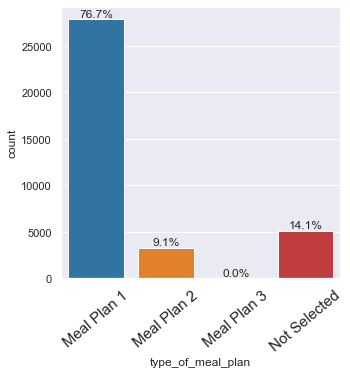

<IPython.core.display.Javascript object>

In [26]:
# Creating a labeled barplot of type_of_meal_plan variable
labeled_barplot(df, "type_of_meal_plan", perc=True)

**Observations:**
* **Most(76.7% of) guests** in this dataset **booked the meal plan 1**.
* **14.1%** of guests in this dataset **did not select a meal plan**.
* 9.1% of guests booked the meal plan 2.
* Very few(least number of) guests booked the meal plan3

#### Required_car_parking_space

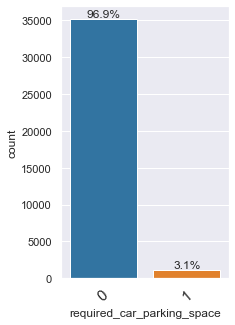

<IPython.core.display.Javascript object>

In [27]:
# Creating a labeled barplot of required_car_parking_space variable
labeled_barplot(df, "required_car_parking_space", perc=True)

**Observations:**
* **A large majority(96.9%)** of guests in this dataset **do not require a car parking space**.
* **3.1% of guests or customers** in this dataset **require a car parking space**.

#### Room_type_reserved

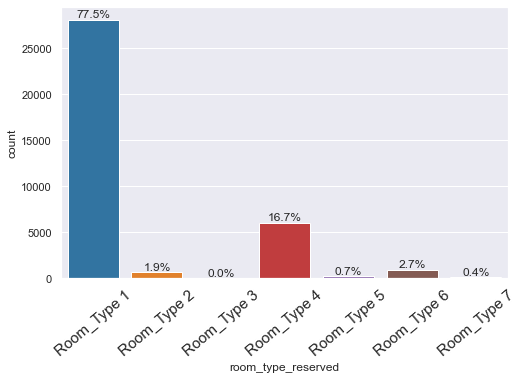

<IPython.core.display.Javascript object>

In [28]:
# Creating a labeled barplot of Room_type_reserved variable
labeled_barplot(df, "room_type_reserved", perc=True)

**Observations:**
Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **Most(77.5%)** customers in this dataset reserved **Room type 1** of the INN hotel.
* **16.7%** of customers in this dataset reserved **Room type 4**.
* **2.7%** of customers in this dataset reserved **Room type 6**.
* **1.9%** of customers in this dataset reserved **Room type 2**
* **0.7%** of customers in this dataset reserved **Room type 5**.
* **0.4%** of customers in this dataset reserved **Room type 7**
* The least reserved room type by customers in this dataset is **the Room type 3**

#### Repeated_guest

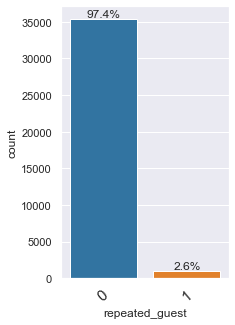

<IPython.core.display.Javascript object>

In [29]:
# Creating a labeled barplot of repeated_guest variable
labeled_barplot(df, "repeated_guest", perc=True)

**Observations:**
* There are **2.6% of** repeated guests in this dataset.
* **Most (97.4% of)** customers/guests in this dataset are **not repeated** guests.

#### No_of_special_requests

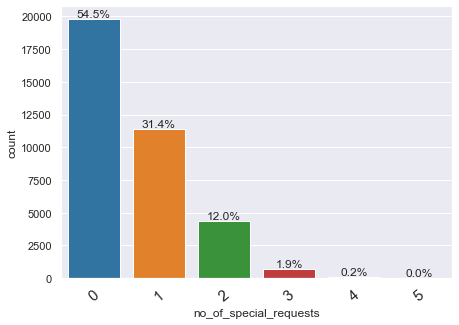

<IPython.core.display.Javascript object>

In [30]:
# Creating a labeled barplot of no_of_special_requests variable
labeled_barplot(df, "no_of_special_requests", perc=True)

**Observations:**
Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **Most(54.5% of)** customers in this dataset made **no special requests**.
* **31.4%** of customers  in this dataset made **one special requests**.
* **12.0%** of customers  in this dataset made **two special requests.**
* **1.9%** of customers  in this dataset made **3 special requests.**
* **Less than 1%** of customers in this dataset made 4 or more special requests.

#### Booking_status

**Q.4. What percentage of bookings are canceled?**

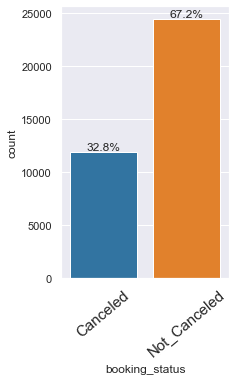

<IPython.core.display.Javascript object>

In [31]:
# Creating a labeled barplot of Booking_status variable
labeled_barplot(df, "booking_status", perc=True)

**Observations:**
* There are **32.8% of bookings in this dataset that are cancelled**.
* There are **67.2%** of bookings in this dataset that **are not cancelled.**
* Hence,there are more bookings in this dataset that are not cancelled than those that are cancelled.

**In Booking_status column,Encoding Not_Canceled as 0 and Canceled as 1 to further analysis.**

In [32]:
# Encoding Not_Canceled as 0 and Canceled as 1
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

# Viewing the first 5 rows of booking_status column
df[["booking_status"]].head()

,booking_status
0,0
1,0
2,1
3,1
4,1


<IPython.core.display.Javascript object>

## Bivariate Analysis

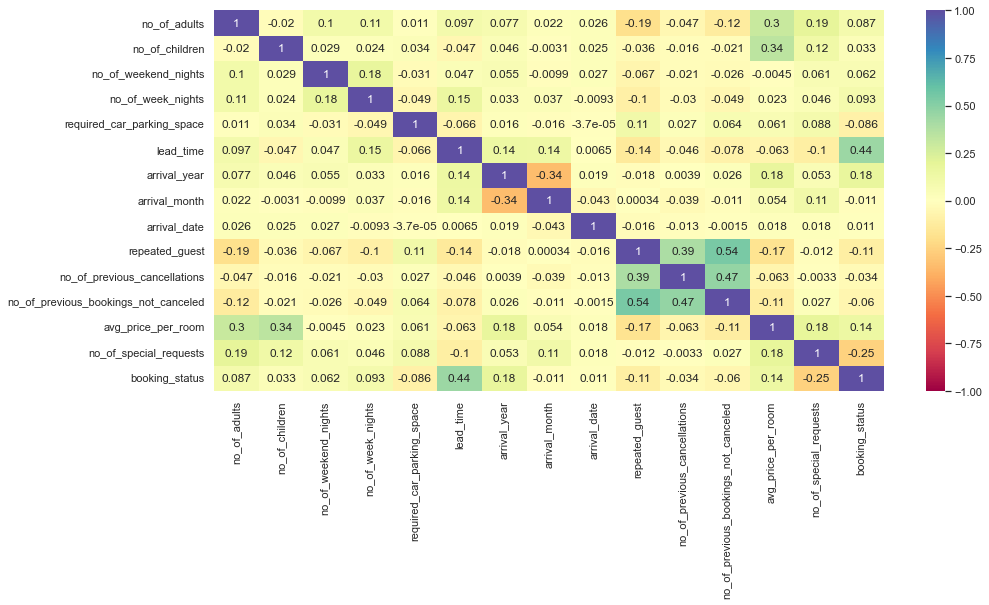

<IPython.core.display.Javascript object>

In [33]:
# Creating a correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

**Observations:**
* Booking_status shows highest correlation(0.44) with lead_time.
* No_of_previous_bookings_not_canceled shows an average positive correlation(0.54) with repeated_guest.
* No_of_previous_bookings_not_canceled also shows an average positive correlation(0.47) with no_of_previous_cancellations.

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

**Q3.Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

#### Avg_price_per_room vs market_segment_type

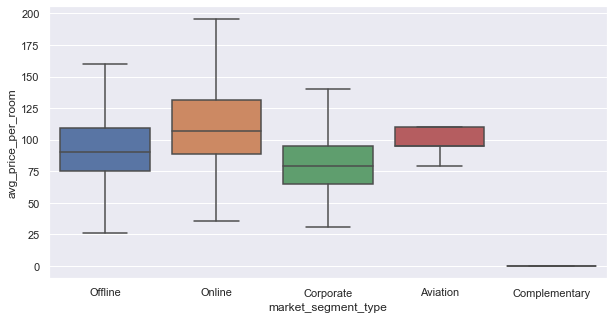

<IPython.core.display.Javascript object>

In [35]:
# Plotting a boxplot of avg_price_per_room vs market_segment_type
plt.figure(figsize=(10, 5))
sns.boxplot(df["market_segment_type"], df["avg_price_per_room"], showfliers=False)
plt.show()

In [36]:
# Checking the room prices in different market segments
df.groupby(["market_segment_type"])["avg_price_per_room"].mean().sort_values(
    ascending=False
)

market_segment_type
Online           112.256855
Aviation         100.704000
Offline           91.632679
Corporate         82.911740
Complementary      3.141765
Name: avg_price_per_room, dtype: float64

<IPython.core.display.Javascript object>

**Observations:**
*  Online market segment have the highest average room prices,followed by the Aviation market segment.
* Complementary market segment have the lowest average room prices.

#### Avg_price_per_room vs No_of_special_requests

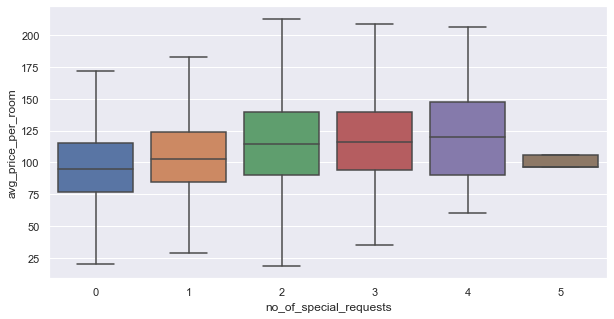

<IPython.core.display.Javascript object>

In [37]:
# Plotting a boxplot of Avg_price_per_room vs No_of_special_requests
plt.figure(figsize=(10, 5))
sns.boxplot(df["no_of_special_requests"], df["avg_price_per_room"], showfliers=False)
plt.show()

**Observations:**
* Customers that did not make any special request had the lowest average room prices.

#### Avg_price_per_room vs type_of_meal_plan

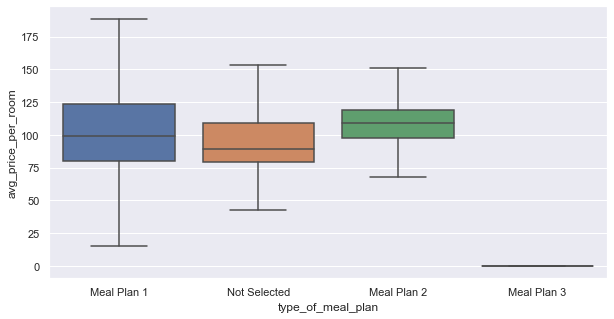

<IPython.core.display.Javascript object>

In [38]:
# Plotting a boxplot of Avg_price_per_room vs type_of_meal_plan
plt.figure(figsize=(10, 5))
sns.boxplot(df["type_of_meal_plan"], df["avg_price_per_room"], showfliers=False)
plt.show()

**Observations:**
* Customers that booked meal plan 2 have the highest average room price.
* Customers that booked meal plan 3 have the lowest average room price.

#### Avg_price_per_room vs booking_status

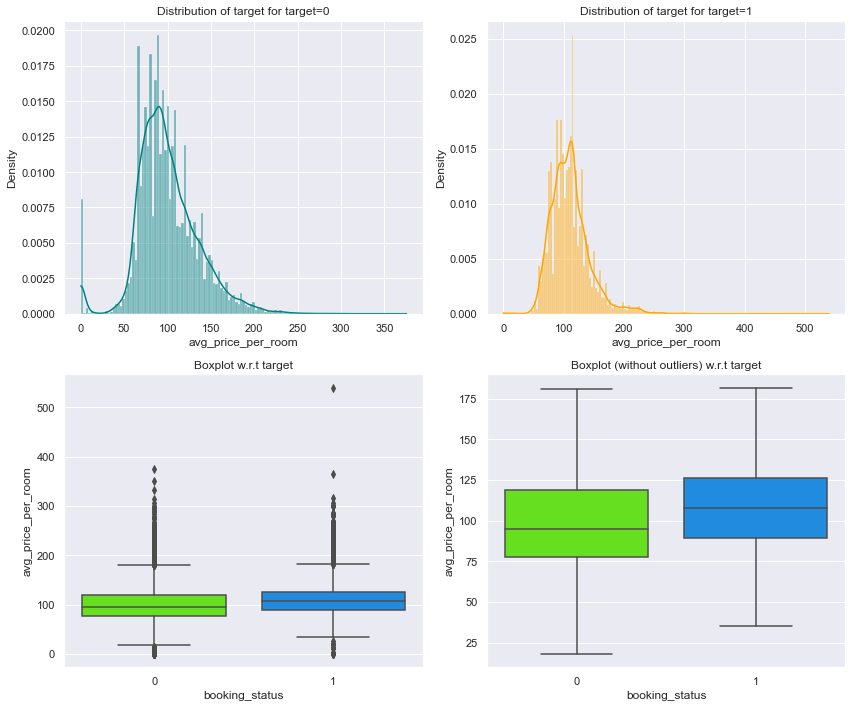

<IPython.core.display.Javascript object>

In [39]:
# Using the function to plot the distributions and boxplot of Avg_price_per_room vs booking_status
distribution_plot_wrt_target(df, "avg_price_per_room", "booking_status")

**Observations:**
* Guests that cancelled their hotel bookings had higher average room prices than those that did not cancel their hotel bookings.

#### Avg_price_per_room vs arrival_month

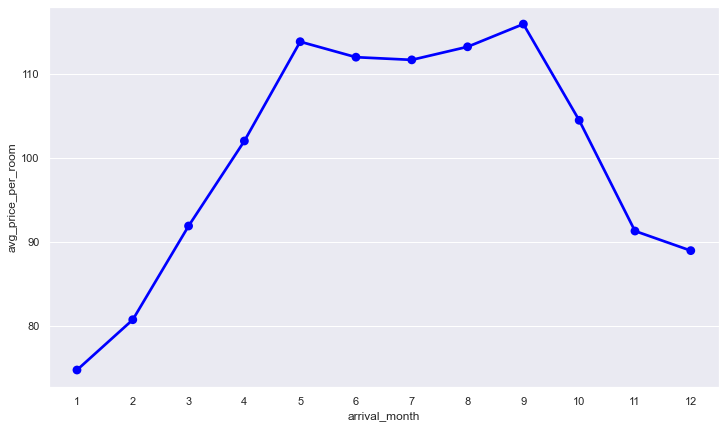

<IPython.core.display.Javascript object>

In [40]:
# Plotting a pointplot of Avg_price_per_room vs arrival_month
plt.figure(figsize=(12, 7))
sns.pointplot(x="arrival_month", y="avg_price_per_room", ci=None, data=df, color="Blue")
plt.show()

**Observations:**
* From the month of January to May there is a sharp increase in the hotel room prices.
* The room prices is highest in the month of September.
* There is a decrease in the room prices from the month of september to December.
* The room prices is lowest on the month of January.

#### Booking_status vs lead_time

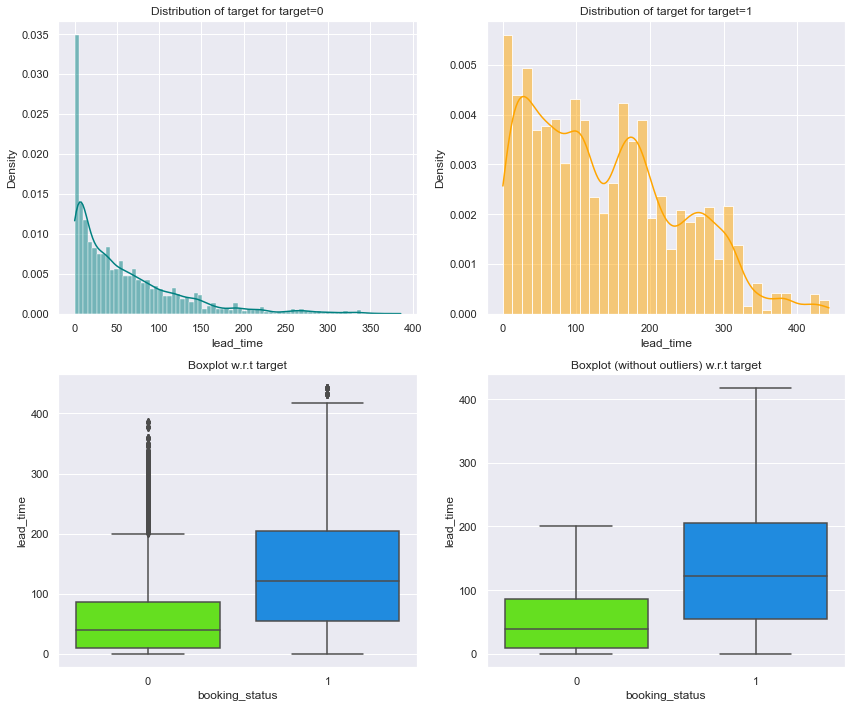

<IPython.core.display.Javascript object>

In [41]:
# Using the function to plot the distribution and boxplot of Avg_price_per_room vs booking_status
distribution_plot_wrt_target(df, "lead_time", "booking_status")

**Observations:**
 * Customers that cancelled their hotel bookings have higher lead time(number of days between the date of booking and the arrival date) than those customers that did not cancel their hotel bookings.
 This entails that guests that booked the hotel longer  before their arrival date are more likely to cancel their bookings than those that booked the hotel fewer days before their arrival at the hotel.


In [42]:
# Function that plots stacked bar plots wrt to target
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Q5.Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

#### Repeated_guest vs Booking_status

repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
0               23476  914  24390
1               11869   16  11885
------------------------------------------------------------------------------------------------------------------------


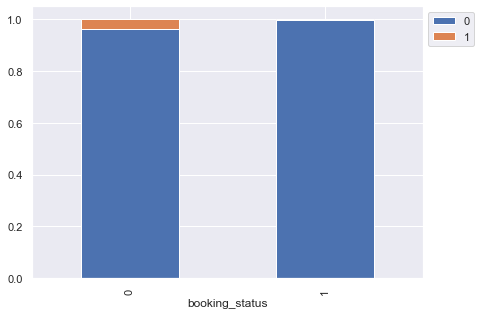

<IPython.core.display.Javascript object>

In [43]:
# Plotting a stacked bar plot of Repeated_guest vs Booking_status
stacked_barplot(df, "booking_status", "repeated_guest")

**Observations:**
* There are more(majority of) repeated guests(that is 914 guests which is ~2.585% of the guests in this dataset) that **do not cancel** their hotel bookings compared to those(16 guests) that cancel their bookings.

**Q6.Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

#### Booking_status vs no_of_special_requests

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


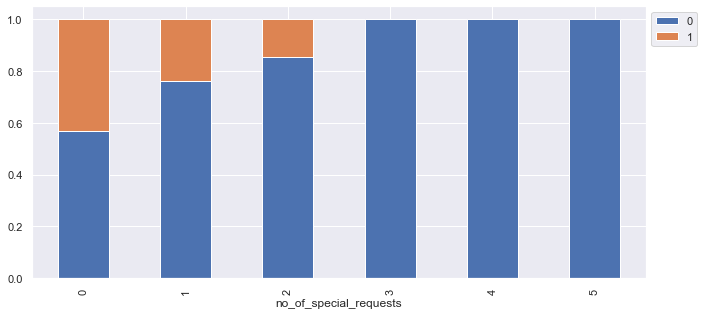

<IPython.core.display.Javascript object>

In [44]:
# Plotting a stacked bar plot of Repeated_guest vs Booking_status
stacked_barplot(df, "no_of_special_requests", "booking_status")

**Observations:**
* Guests that have special requirements are less likely to **cancel** their hotel bookings.The above plot goes further to show that guests that had at least 3 special requirements **did not cancel** their hotel booking.
* Guests that did mentioned or include their special requirement are more likely to **cancel their hotel booking.**

**Checking if the effect of special requirements on booking cancellation is statistically significant using the Chi-square test of independence.**

In [45]:
# To perform statistical analysis
import scipy.stats as stats

# Contingency table of booking_status and no_of_special_requests attributes
crosstab = pd.crosstab(df["booking_status"], df["no_of_special_requests"])

Ho = "Special requirement has no effect on booking cancellation"  # Stating the Null Hypothesis
Ha = "Special requirement has an effect on booking cancellation"  # Stating the Alternate Hypothesis

# Performing the Chi-Square test
chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

Special requirement has an effect on booking cancellation as the p_value (0.0) < 0.05


<IPython.core.display.Javascript object>

**Observation:**
* From the above chi-square test done,p_value is < 0.05 this implies that the difference we see in the above plot of booking_status vs no_of_special_requests is statistically significant.

**Q1.What are the busiest months in the hotel?**

#### Arrival_month vs booking_status

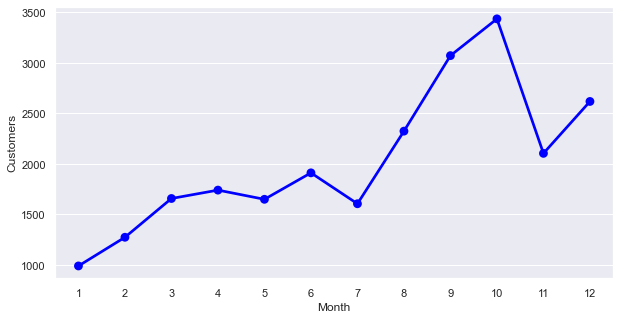

<IPython.core.display.Javascript object>

In [46]:
# Filtering and extracting customers that did not cancel their hotel bookings
not_cancelled = df[df["booking_status"] == 0]

# Grouping the data on arrival month and the count of customers that did not cancel their booking
month_data = not_cancelled.groupby(["arrival_month"])["booking_status"].count()

# Creating a DataFrame with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(month_data.index), "Customers": list(month_data.values)}
)

# Plotting a pointplot of monthly arrival of customers 
plt.figure(figsize=(10, 5))
sns.pointplot(x="Month", y="Customers", ci=None, data=monthly_data, color="Blue")
plt.show()


**Observations:**
* From the above plot,the **most busiest month** is the **month of October**(highest peak).Most customers arrive at the hotel on the month of October.
* The **least busiest month** is the month of **January**.Fewer customers arrive at the hotel on the month of January. 

#### No_of_weekend_nights and No_of_week_nights vs booking_status

In [47]:
# Extracting and creating a new DataFrame of
# guests that booked to stay for at least 1 week night and 1 weekend night at the hotel
stay_data = df[(df["no_of_week_nights"] > 0) & (df["no_of_weekend_nights"] > 0)]
print(
    f"There are {stay_data.shape[0]} guests that booked the hotel for at least one week night and one weekend night"
)  # printing the number of guests that booked the hotel for at least one week and weekend night

# Calculating and creating a new column of the total number of days booked by guests
# to stay at the hotel for at least one week night and one weekend night
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

There are 17094 guests that booked the hotel for at least one week night and one weekend night


<IPython.core.display.Javascript object>

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

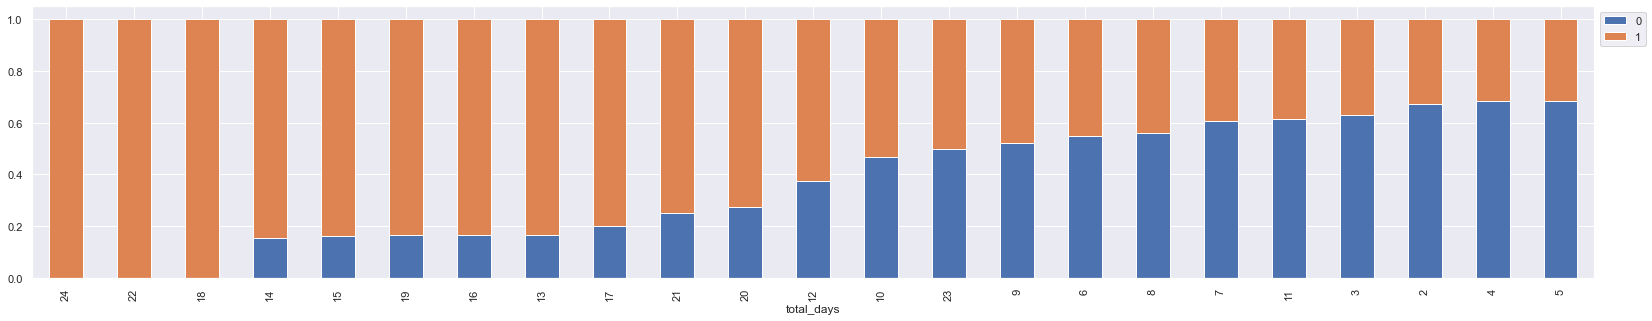

<IPython.core.display.Javascript object>

In [48]:
# Plotting a stacked bar plot of total days vs Booking_status
stacked_barplot(stay_data, "total_days", "booking_status")

**Observations:**
* There are 17094 guests that book the hotel for at least one week night and one weekend night
* Customers that **cancelled their bookings of least  10 hotel nights(week and weekend nights) were more compared** to those that did not cancel their hotel bookings of at least 10 hotel nights,
* Customers that **did not cancel their bookings of at least 10 nights were more** compared to those that cancelled their bookings of at least 10 hotel nights.


#### No_of_children and no_of_adults vs booking_status

In [49]:
# Extracting and creating a dataframe of guests who travelled with thier spouses and children
family_data = df[(df["no_of_children"] >= 0) & (df["no_of_adults"] > 1)]

# Printing the number of guests who travelled with their spouses and children
print(
    f"There are {family_data.shape[0]} who travelled with their spouses and children."
)

# Calculating the number of family members of each customer and adding the column
# no_of_family_members in the Dataframe
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

There are 28441 who travelled with their spouses and children.


<IPython.core.display.Javascript object>

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        10     5     15
11                        0     1      1
12                        1     0      1
------------------------------------------------------------------------------------------------------------------------


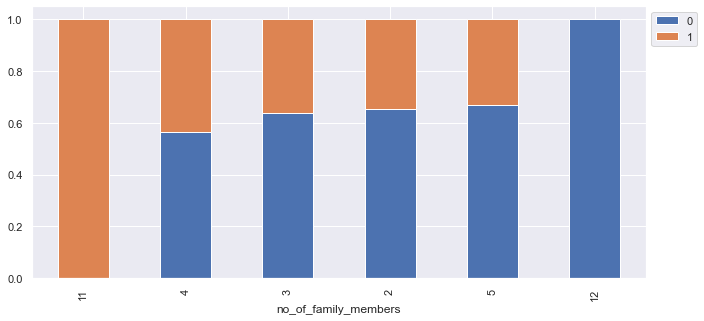

<IPython.core.display.Javascript object>

In [50]:
## Plotting a stacked bar plot of number of family members vs Booking_status
stacked_barplot(family_data, "no_of_family_members", "booking_status")

**Observations:**
* There is only one guest with a number of 12 family members who **did  not cancel** his/her booking.
* There is one guest with a number of 11 family members who ended up canceling his/her hotel booking,
* There are more guests having 2,3,4 and 5 family who **did not cancel** their hotel booking compared to those that cancelled.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Outlier detection and treatment

**Outliers detection using boxplot**

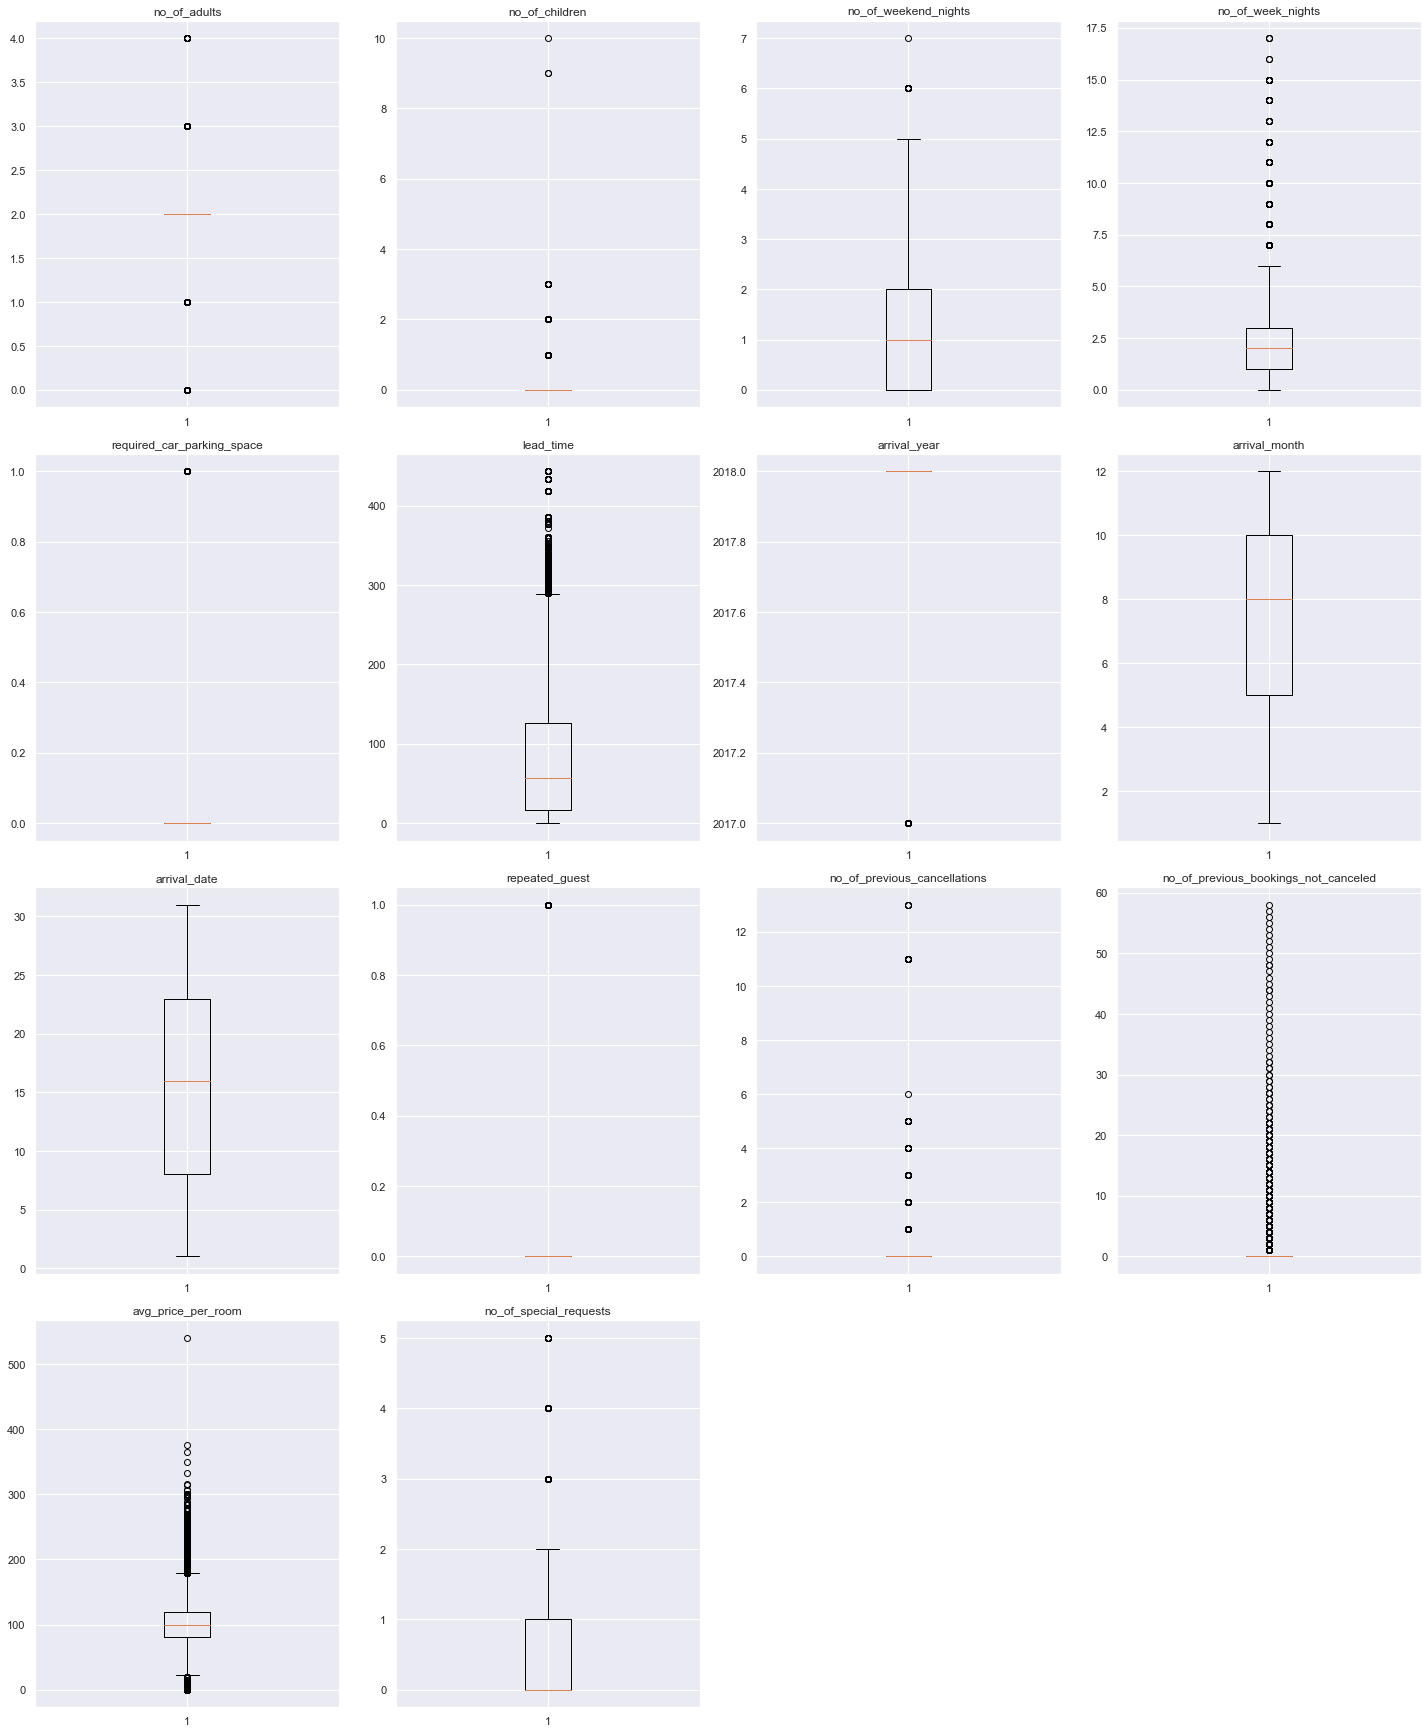

<IPython.core.display.Javascript object>

In [51]:
# Making a list of numerical columns to check for outliers
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))
# dropping booking_status as it is the target variable
numerical_col.remove("booking_status")

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


**Observations:**
* Lead_time, and no_of_previous_bookings_not_canceled  have upper outliers.
* Avg_price_per_room,and no_of_previous_cancellations have both lower and upper outliers.

**Outliers Treatment**

In [52]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>


* **I'll treat outliers on the numeric variable Avg_price_per_room only.**


In [53]:
# Making a list of column to be treated
col_to_treat = ["avg_price_per_room"]

# Applying the function to treat outlier on the list of columns to be treated
# and creating a new DataFrame df1
df1 = treat_outliers_all(df, col_to_treat)

<IPython.core.display.Javascript object>

## EDA

- It is a good idea to explore the data once again after manipulating it.

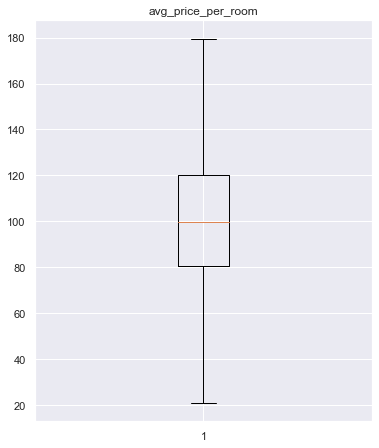

<IPython.core.display.Javascript object>

In [54]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(col_to_treat):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df1[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)


**Observation:**
* Outliers on the avg_price_per_room variable have been treated.

### Data Preparation

In [55]:
# Defining the independent and dependent(target) variable
X = df1.drop(["booking_status", "arrival_date",], axis=1,)
Y = df1["booking_status"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=["type_of_meal_plan", "room_type_reserved", "market_segment_type"],
    drop_first=True,
)

# adding constant
X = sm.add_constant(X)

# Converting independent variables into float data types
X = X.astype(float)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [56]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model Building 

#### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a guest/customer will not cancel their hotel booking  but in reality the guest/customer will cancel their booking.
2. Predicting a guest/customer will cancel their hotel booking  but in reality the guest/customer will not cancel their booking.

#### Which case is more important? 
* Both the cases are important as:

* If we predict a guest/customer will not cancel their hotel booking  but in reality the guest/customer will cancel their booking,the hotel will lose resources, have reduction in its profit margin and will have to pay additional cost for publicity inorder to resell the room.

* If we predict a guest/customer will cancel their hotel booking  but in reality the guest/customer will not cancel their booking,the hotel will not be able to provide its good quality services to the customer by assuming the customer/guest will cancel their booking constituting to opportunity loss.



#### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### Creating functions to calculate different metrics and confusion matrix so that the same code will not have to be used repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [57]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [58]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [59]:
# instantiate the model using the default parameters
logreg = LogisticRegression()
# fit the model with data
lg = logreg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Logistic Regression (with statsmodels library)

#### Building a Logistic Regression model

In [60]:
# Building a logistic Regression model
model = sm.Logit(y_train, X_train).fit(disp=False)
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3287
Time:                        09:16:12   Log-Likelihood:                -10802.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.1458    120.786     -7.635      0.000   -1158.882    -685.409
no_of_adults                             0.1138      

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer cancelling the booking decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer cancelling booking increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* Multicollinearity have to be first removed from the data to get reliable coefficients and p-values.

#### Checking model performance on training set

In [61]:
print("Training performance:")
model_performance_classification_statsmodels(model, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805884,0.633863,0.739537,0.682635


<IPython.core.display.Javascript object>

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [62]:
# Checking multicollinearity using VIF's score
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                   3.954314e+07
no_of_adults                            1.349184e+00
no_of_children                          1.973914e+00
no_of_weekend_nights                    1.069876e+00
no_of_week_nights                       1.096456e+00
required_car_parking_space              1.039675e+00
lead_time                               1.393000e+00
arrival_year                            1.433594e+00
arrival_month                           1.275596e+00
repeated_guest                          1.783754e+00
no_of_previous_cancellations            1.395614e+00
no_of_previous_bookings_not_canceled    1.651999e+00
avg_price_per_room                      1.966738e+00
no_of_special_requests                  1.247193e+00
type_of_meal_plan_Meal Plan 2           1.270078e+00
type_of_meal_plan_Meal Plan 3           1.025110e+00
type_of_meal_plan_Not Selected          1.277020e+00
room_type_reserved_Room_Type 2          1.102108e+00
room_type_r

<IPython.core.display.Javascript object>

**Observations:**
* Market_segment_type_Offline,market_segment_type_Corporate and market_segment_type_Online variables have high VIF's score that is greater than 10.This indicates that these variables shows multicollinearity.
* Market_segment_type_Online variable will be dropped first since it has the highest vif score and vif scores will be rechecked.


#### Dropping Market_segment_type_Online variable

In [63]:
# Dropping "market_segment_type_Online variable on both train and test set
X_train1 = X_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
X_test1 = X_test.drop("market_segment_type_Online", axis=1)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                   3.946462e+07
no_of_adults                            1.332948e+00
no_of_children                          1.973042e+00
no_of_weekend_nights                    1.069448e+00
no_of_week_nights                       1.095924e+00
required_car_parking_space              1.039541e+00
lead_time                               1.388699e+00
arrival_year                            1.431081e+00
arrival_month                           1.274531e+00
repeated_guest                          1.780463e+00
no_of_previous_cancellations            1.395371e+00
no_of_previous_bookings_not_canceled    1.651757e+00
avg_price_per_room                      1.965798e+00
no_of_special_requests                  1.242362e+00
type_of_meal_plan_Meal Plan 2           1.269701e+00
type_of_meal_plan_Meal Plan 3           1.025110e+00
type_of_meal_plan_Not Selected          1.275175e+00
room_type_reserved_Room_Type 2          1.101935e+00
room_type_r

<IPython.core.display.Javascript object>

**Observations:**
* Removing market_segment_type_Online have fixed multicollinearity in the other columns that had high VIF's score.
* There is no more multicollinearity in the data.
* Significance of attributes will now be checked using their p_values.

In [64]:
# Building a new logistic model with new X_train1 variables
model1 = sm.Logit(y_train, X_train1).fit(disp=False)
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25366
Method:                           MLE   Df Model:                           25
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3287
Time:                        09:16:15   Log-Likelihood:                -10803.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -931.1613    120.624     -7.720      0.000   -1167.579    -694.743
no_of_adults                             0.1062      

<IPython.core.display.Javascript object>

In [65]:
# Checking model performance on train set
print("Training performance:")
model_performance_classification_statsmodels(model1, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805726,0.633146,0.739525,0.682213


<IPython.core.display.Javascript object>

* The F1 score hasn't changed much after removing "market_segment_type_Online" variable which is good.

#### Dropping high p-value variables

**Predictor variables having high p-values will be dropped as such variables are insignificant to the model.** 

In [66]:
# Running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

In [67]:
# Creating a new X_train2 and X_test2 with features having p_values<0.05
X_train2 = X_train1[selected_features]
X_test2 = X_test1[selected_features]

<IPython.core.display.Javascript object>

In [68]:
# Building a new logistic model with new X_train2 variables
model2 = sm.Logit(y_train, X_train2).fit(disp=False)
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3276
Time:                        09:16:16   Log-Likelihood:                -10820.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.0650    120.402     -7.600      0.000   -1151.049    -679.081
no_of_adults                       0.1089      0.037      2.924      0.

<IPython.core.display.Javascript object>

**Observations:**
* There are now no attributes with high p_values.The features in X_train2 will be considered as the final ones and the model2 will be considered as the final logistic regression model.
    

####  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds, the exponential of the coefficients is taken. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [69]:
# converting coefficients to odds
odds = np.exp(model2.params)

# finding the percentage change
perc_change_odds = (np.exp(model2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.0,1.115093,1.179044,1.116072,1.044770,0.204789,1.015793,1.571404,0.958298,0.065339,1.259442,1.020544,0.229987,1.208677,1.348567,0.716169,0.742465,0.486271,0.477406,0.453144,0.459733,0.170870
Change_odd%,-100.0,11.509266,17.904370,11.607183,4.477003,-79.521051,1.579332,57.140368,-4.170197,-93.466077,25.944235,2.054388,-77.001284,20.867698,34.856723,-28.383150,-25.753517,-51.372858,-52.259416,-54.685625,-54.026737,-82.913041


<IPython.core.display.Javascript object>

**Observations:**
* `no_of_weekend_nights `: Holding all other features constant a 1 unit change in no_of_weekend_nights will increase the odds of a guests cancelling his/her hotel booking  by 1.18 times or a 11.6% increase in odds of cancelling booking.
* `avg_price_per_room`: Holding all other features constant a 1 unit change in the avg_price_per_room will increase the odds of a guests cancelling hotel booking by 1.02 times or a increase of 2.05% increase in odds of cancelling hotel bookings.
* The odds of a guests coming from the offline market segment_type is 0.17  less than a guests coming from the aviation market segment or 82.9% fewer odds of cancelling booking. Similarly, The odds of a guests coming from the Corporate market segment type cancelling booking is 0.45 times less than the guests coming from the aviation market segment or 54.0% less odds of cancelling booking than the guests coming from the aviation market segment. [keeping the aviation market segment].

`Interpretation for other attributes can be done similarly.`

## Model performance evaluation

#### Checking model performance on the training set

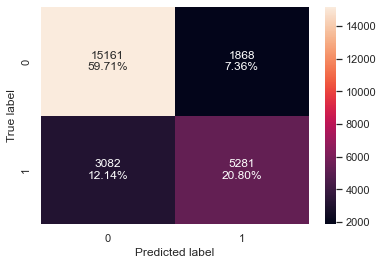

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, X_train2, y_train)

In [71]:
# Checking performance on the training set
log_reg_model_train_perf = model_performance_classification_statsmodels(
    model2, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805057,0.631472,0.738705,0.680892


<IPython.core.display.Javascript object>

#### ROC-AUC

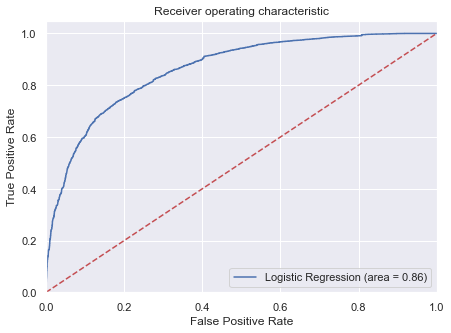

<IPython.core.display.Javascript object>

In [72]:
# ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, model2.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, model2.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Observations:**
 * Logistic Regression model is giving a quite good performance on training set.   

#### Model Performance Improvement

* Let's see if the Recall,Precision and consequently the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

#### Optimal threshold using AUC-ROC curve

In [73]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, model2.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3684531478052088


<IPython.core.display.Javascript object>

#### Checking model performance on training set

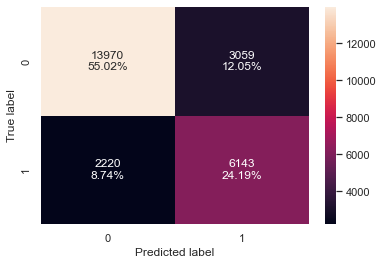

<IPython.core.display.Javascript object>

In [74]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [75]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    model2, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.7921,0.734545,0.667572,0.699459


<IPython.core.display.Javascript object>

**Observations:**
* By using the optimal threshold of the AUC-ROC curve,Recall has improved a little by precision has dropped.F1 score hasn't improved much.

 #### Using Precision-Recall curve and to check if a better threshold can be found.

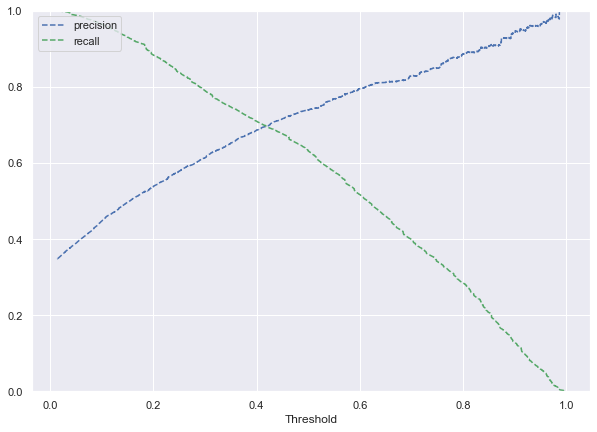

<IPython.core.display.Javascript object>

In [76]:
# Plotting the precision-Recall curve
y_scores = model2.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.42, we get balanced recall and precision.

In [77]:
# setting the threshold
optimal_threshold_curve = 0.42

<IPython.core.display.Javascript object>

#### Checking model performance on training set

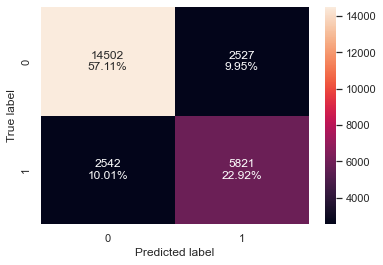

<IPython.core.display.Javascript object>

In [78]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, X_train2, y_train, threshold=optimal_threshold_curve
)

In [79]:
# Checking model performance on training set
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    model2, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.80037,0.696042,0.697293,0.696667


<IPython.core.display.Javascript object>

**Observations:**
* There's not much improvement in the model performance with the optimal threshold of the  Precision-Recall curve.

#### Checking the performance on the test set

**Using model with default threshold**

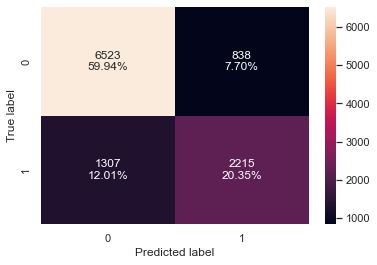

<IPython.core.display.Javascript object>

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, X_test2, y_test)

In [81]:
# Checking performance on test set
log_reg_model_test_perf = model_performance_classification_statsmodels(
    model2, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.802904,0.628904,0.725516,0.673764


<IPython.core.display.Javascript object>

**ROC curve on test set**

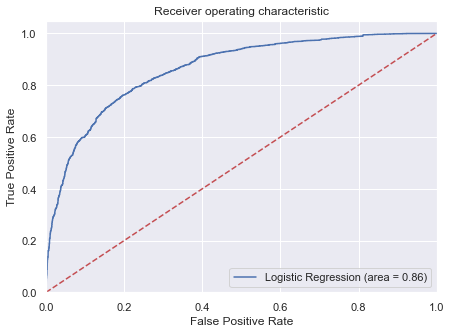

<IPython.core.display.Javascript object>

In [82]:
# Plotting the ROC curve on test set
logit_roc_auc_train = roc_auc_score(y_test, model2.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, model2.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with optimal threshold of ROC curve (=0.368)** 

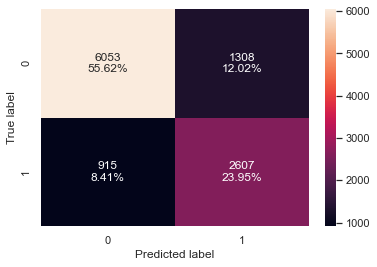

<IPython.core.display.Javascript object>

In [83]:
# creating confusion matrix
confusion_matrix_statsmodels(
    model2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)

In [84]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    model2, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.795736,0.740204,0.6659,0.701089


<IPython.core.display.Javascript object>

**Using model with threshold of Precision-Recall curve (= 0.42)**

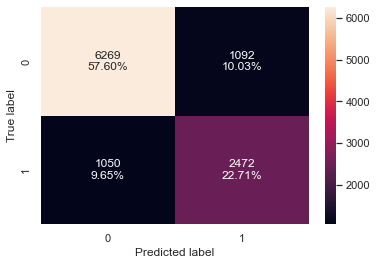

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_statsmodels(model2, X_test2, y_test, threshold=optimal_threshold_curve)

In [86]:
# Checking performance on test set
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    model2, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.803179,0.701874,0.693603,0.697714


<IPython.core.display.Javascript object>

#### Model Performance Summary

In [87]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-ROC curve Threshold (=0.368)",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-ROC curve Threshold (=0.368),Logistic Regression-0.42 Threshold
Accuracy,0.805057,0.792100,0.800370
Recall,0.631472,0.734545,0.696042
Precision,0.738705,0.667572,0.697293
F1,0.680892,0.699459,0.696667


<IPython.core.display.Javascript object>

In [88]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-ROC curve Threshold (=0.368)",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-ROC curve Threshold (=0.368),Logistic Regression-0.42 Threshold
Accuracy,0.802904,0.795736,0.803179
Recall,0.628904,0.740204,0.701874
Precision,0.725516,0.665900,0.693603
F1,0.673764,0.701089,0.697714


<IPython.core.display.Javascript object>

**Observations:**
 * The model with the ROC Curve threshold happens to be  the one that performed better on both the train and test set, as it has the highest F1 score and are comparable on both sets.

## Final Model Summary

In [89]:
# Final model summary
model2 = sm.Logit(y_train, X_train2).fit(disp=False)
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Mar 2022   Pseudo R-squ.:                  0.3276
Time:                        09:16:19   Log-Likelihood:                -10820.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.0650    120.402     -7.600      0.000   -1151.049    -679.081
no_of_adults                       0.1089      0.037      2.924      0.

<IPython.core.display.Javascript object>

### Coefficient interpretations
* Coefficients of no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,no_of_previous_cancellations,avg_price_per_room,type_of_meal_plan_Meal Plan 2 ,and type_of_meal_plan_Not Selected are positive,this implies that  an increase in these features will lead to an increase in chances of a guests cancelling his hotel booking. 

* Coefficient of required_car_parking_space,arrival_month,repeated_guest, no_of_special_requests,room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline and market_segment_type_Corporate  are negative, this implies that an increase in these variables or features will lead to a decrease in chances of a guests cancelling his hotel booking.

## Decision Tree


In [90]:
# Defining the independent and dependent(target) variable
X = df1.drop(["booking_status"], axis=1)
Y = df1["booking_status"]

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [91]:
# Printing the shape of training and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

# Printing the percentage classes in training and test set
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0    0.670644
1    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.676376
1    0.323624
Name: booking_status, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

In [92]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [93]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building a Decision Tree model

In [94]:
# Building a Decision Tree model
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

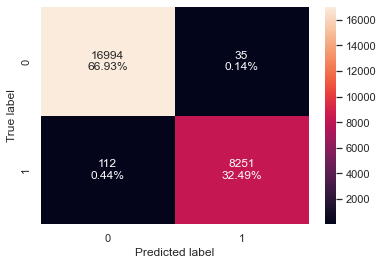

<IPython.core.display.Javascript object>

In [95]:
# Creating a confusion metrix of training set
confusion_matrix_sklearn(model, X_train, y_train)

In [96]:
# Checking performance on training set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994211,0.986608,0.995776,0.991171


<IPython.core.display.Javascript object>

**Observations:**
* Model is able to perfectly classify all the data points on the training set.
* Errors on the training set is close to  0, each sample has been classified correctly.But a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.  

#### Checking model performance on test set

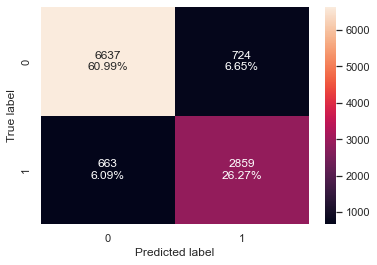

<IPython.core.display.Javascript object>

In [97]:
# Confusion matrix of test set
confusion_matrix_sklearn(model, X_test, y_test)

In [98]:
# Checking model performance on training set
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.872554,0.811755,0.797935,0.804785


<IPython.core.display.Javascript object>

**Observations:**
* There is quite some disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

Text(0.5, 0, 'Relative Importance')

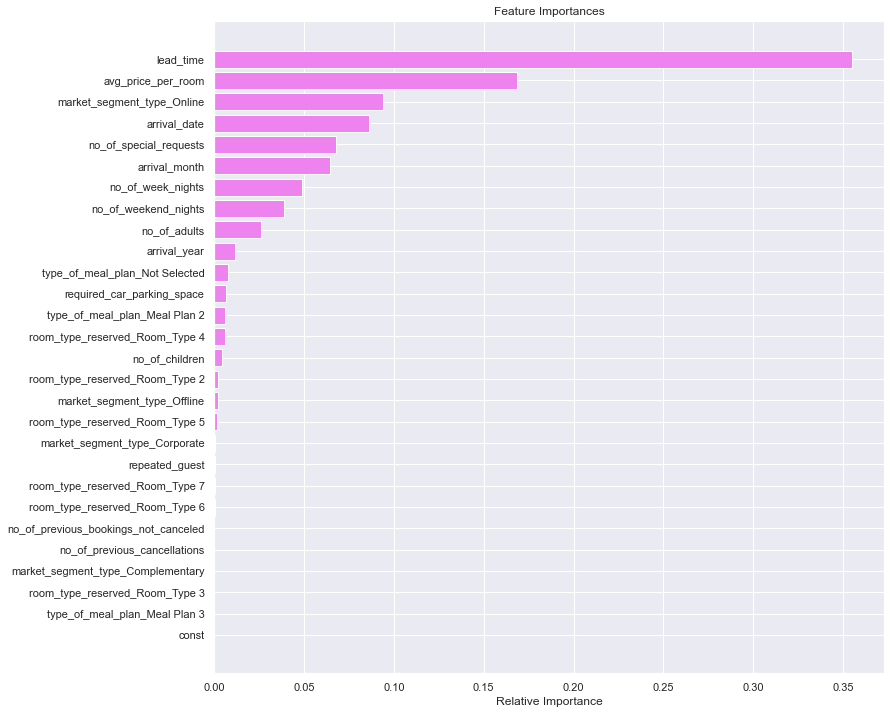

<IPython.core.display.Javascript object>

In [99]:
# Checking the important features before pruning the tree
## creating a list of column names
feature_names = X_train.columns.to_list()


## Checking important features before pruning the tree
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")

**Observations:**
* According to the decision tree model, lead_time is the most important variable for predicting booking cancellations.

## Do we need to prune the tree?

* As seen above,there is overfitting and inorder to reduce overfitting of the model,the tree needs to be pruned.

### Pruning the Tree

##### Pre-pruning
**Reducing over fitting using GridSearch for Hyperparameter tuning of the tree model**

In [100]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

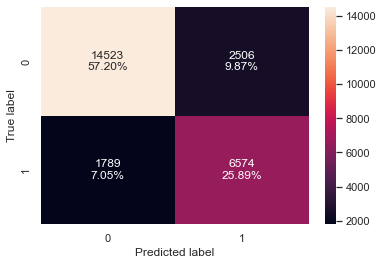

<IPython.core.display.Javascript object>

In [101]:
# Creating the confusion matrix of training set before prunning
confusion_matrix_sklearn(estimator, X_train, y_train)

In [102]:
# Checking performance of model on training set
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.830852,0.786082,0.724009,0.753769


<IPython.core.display.Javascript object>

#### Checking performance on test set¶

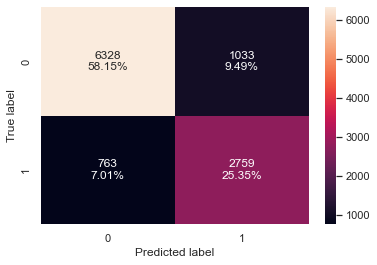

<IPython.core.display.Javascript object>

In [103]:
# Creating a confusion matrix of the test set of pre tuned decision tree
confusion_matrix_sklearn(estimator, X_test, y_test)

In [104]:
# Checking model performance of the pre tuned decision tree on test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.834972,0.783362,0.727584,0.754444


<IPython.core.display.Javascript object>

**Observations:**
* The model is giving a generalized result now.

#### Visualizing the Decision Tree

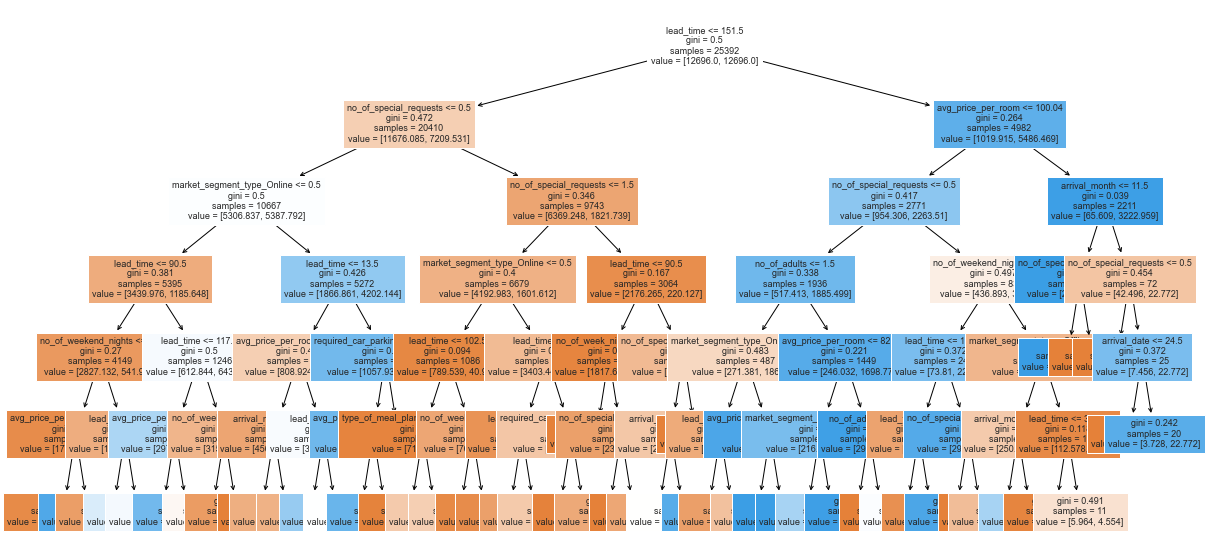

<IPython.core.display.Javascript object>

In [105]:
# visualizing the decision tree after pre-prunning
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [106]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- weights: [1734.15, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  179.47
|   |   |   |   |   |   |--- weights: [2.98, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

**Observations:**
From the above extract of decision rules,some interpretations from the decision tree model can be made as follows:
* If a guest or customer book the hotel less than 151 days before arrival at the hotel and has no special request and do not belong to the online market segment type hotel and do not book any weekend night and pays for a room price of less than 179euros,then that customer will not cancel his/her hotel booking.But if the room price is more than 179 euros then that customer will cancel his/her booking.
* If a guest books the hotel for at least one weekend night and lead_time is less than 68 days,then the guest will not cancel his/her booking.But if the lead time is more than 68days,then the customer will cancel his/her booking.
* If a guest books the hotel more than 90 days and less than 117 days before arrival at the hotel and the room price is less than 93euros,the guest will cancel the booking.Even if,the room price is more than 93euros,the guests will still cancel the booking.

Interpretations of other decision rules can be made similarly as above.

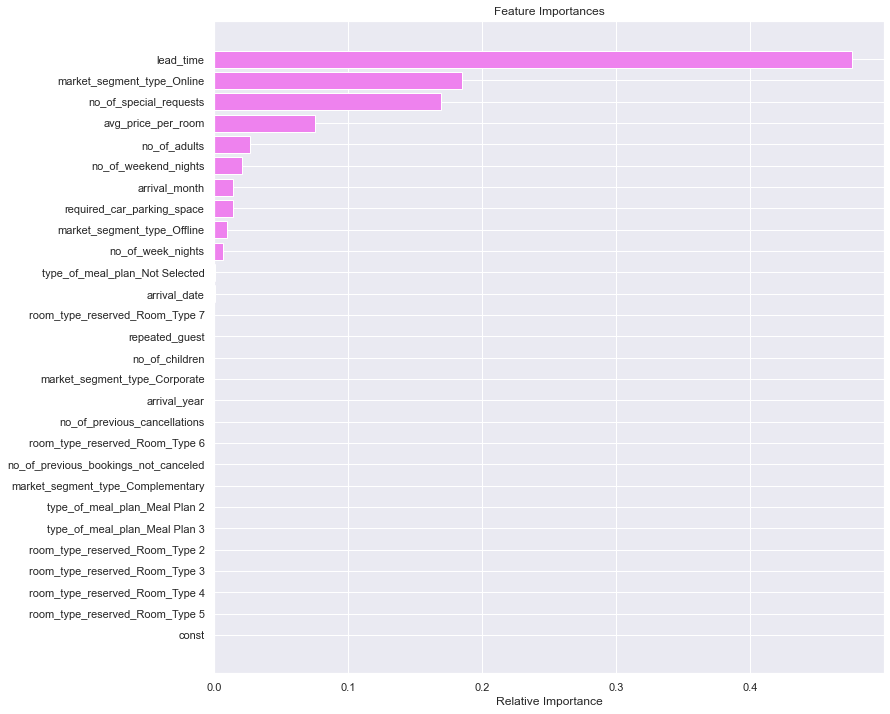

<IPython.core.display.Javascript object>

In [107]:
# Checking important variables of pre tuned decision tree
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* In tuned decision tree,lead_time is the most important feature followed by market_segment_type_Online.

**Cost Complexity Pruning**

In [108]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

In [109]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.008376
1,-2.710505e-20,0.008376
2,1.303920e-20,0.008376
3,1.303920e-20,0.008376
4,1.303920e-20,0.008376
...,...,...
1903,8.901596e-03,0.328058
1904,9.802243e-03,0.337860
1905,1.271875e-02,0.350579
1906,3.412090e-02,0.418821


<IPython.core.display.Javascript object>

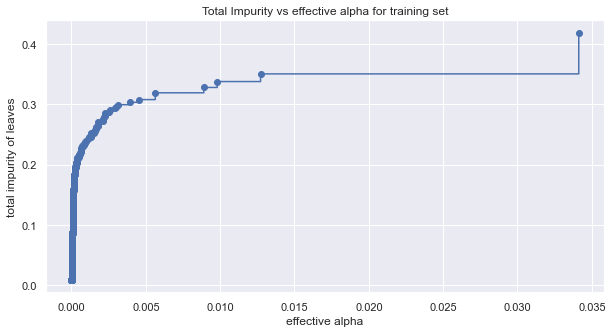

<IPython.core.display.Javascript object>

In [110]:
# Plotting a plot of Total impurities vs effective alpha for the training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

* Next, we train a decision tree using the effective alphas. The last value
  in ``ccp_alphas`` is the alpha value that prunes the whole tree,
  leaving the tree, ``clfs[-1]``, with one node.

In [111]:
# Finding the number of nodes on the last tree and  value of ccp_alpha in the last node
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


<IPython.core.display.Javascript object>

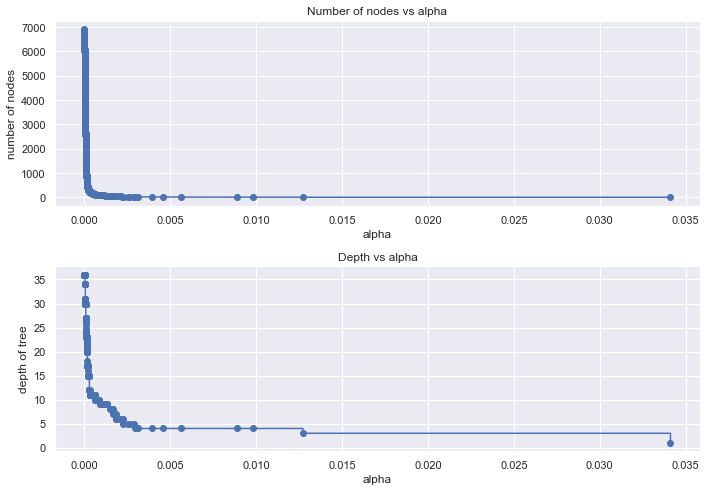

<IPython.core.display.Javascript object>

In [112]:
# Plotting a plot of number of nodes vs alpha and Depth vs alpha
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### F1 Score vs alpha for training and testing sets

In [113]:
# F1 score for training set
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)
# F1 score for test set
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

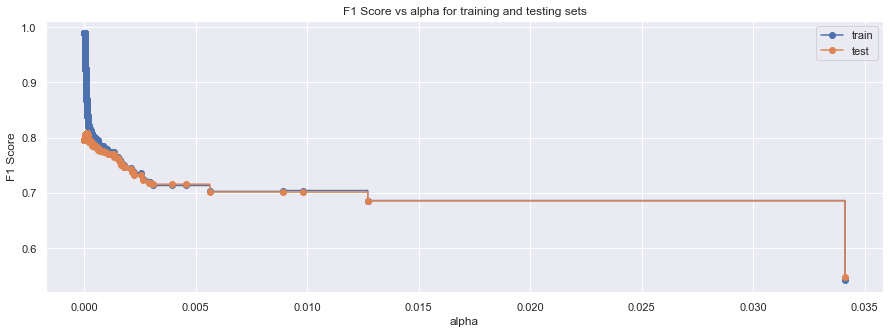

<IPython.core.display.Javascript object>

In [114]:
# Plotting the F1 score vs alpha for training and testing sets
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [115]:
# Finding ccp_alpha for  best f1 score hence best model
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167026,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

In [116]:
# Building the post tuned decision tree
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167026,
                       class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

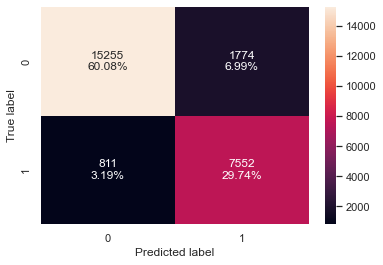

<IPython.core.display.Javascript object>

In [117]:
# Making a confusion matrix for the best model after prunning
confusion_matrix_sklearn(best_model, X_train, y_train)

In [118]:
# Finding out the diffent evaluation metrics on training set after prunning
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.898196,0.903025,0.809779,0.853864


<IPython.core.display.Javascript object>

#### checking performance on test set

In [119]:
# Finding out the diffent evaluation metrics on test set after prunning
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.868419,0.855764,0.765363,0.808043


<IPython.core.display.Javascript object>

**Observations:**
After prunning ,we still notice some difference in the F1 score between the training and test sets ,though the disparity is lesser compared to the first decision tree that was made without any restriction.

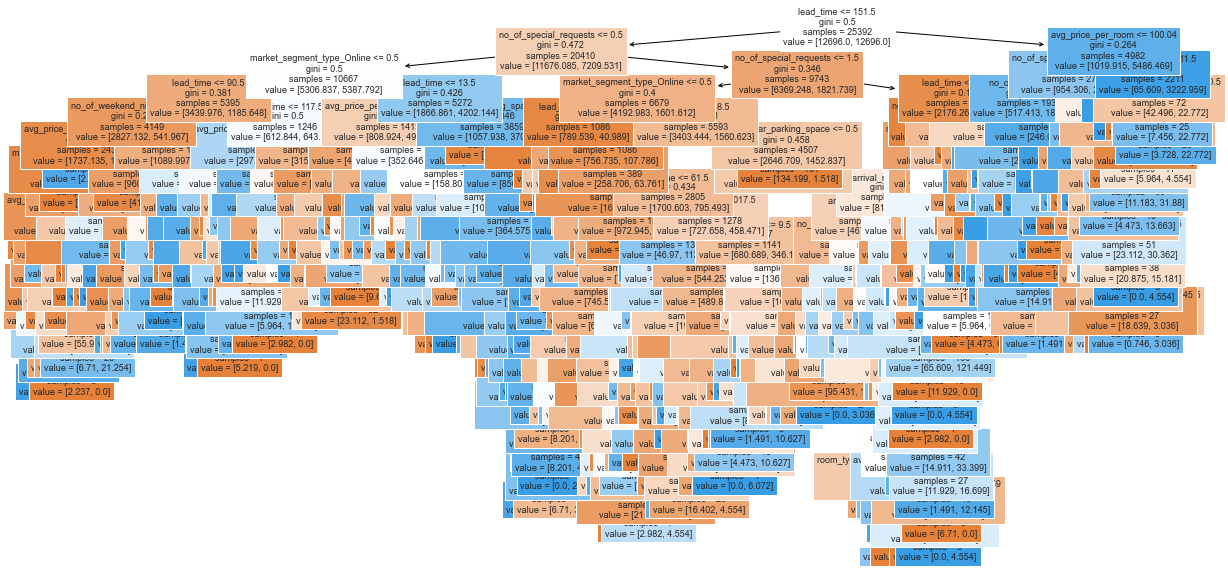

<IPython.core.display.Javascript object>

In [120]:
# Visualing the decision tree after prunning
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [121]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 179.47
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

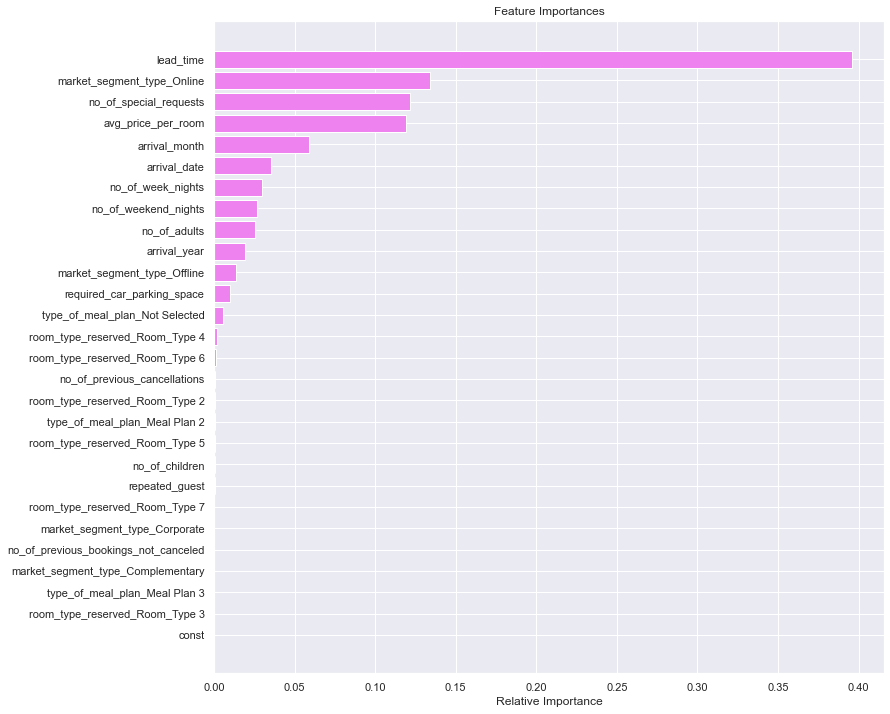

<IPython.core.display.Javascript object>

In [122]:
# Checking the important variables of the post tuned decision tree
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Lead_time and market_segment_type_Online are the top two important features to predict booking cancellations

## Model Performance Comparison and Conclusions

### Comparing Decision Tree models

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994211,0.830852,0.898196
Recall,0.986608,0.786082,0.903025
Precision,0.995776,0.724009,0.809779
F1,0.991171,0.753769,0.853864


<IPython.core.display.Javascript object>

In [124]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
    keys=[
        "Decision Tree sklearn",
        "Decision Tree (Pre-Pruning)",
        "Decision Tree (Post-Pruning)",
    ],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
,0,0,0
Accuracy,0.872554,0.834972,0.868419
Recall,0.811755,0.783362,0.855764
Precision,0.797935,0.727584,0.765363
F1,0.804785,0.754444,0.808043


<IPython.core.display.Javascript object>

**Observations:**
* The pre-pruned model have reduced overfitting and the model is giving a generalized performance and the f1 score on both training and test sets are is not the highest but they are very comparable.Hence this model will be chosen to predict booking cancellations.
* From the pre-pruned model,the most important variable is lead_time followed by market segment type online and no of special request.

 ### Final Conclusion:
 * I have been able to build predictive models(Logistic regression model and Decision tree model) that can be used by the INN Hotels Group to find which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds with an f1_score of 0.70 and 0.75 on the logistic regression model and decision tree model respectfully,on the training set and testing sets.
* On the Logistic regression model, Coefficients of no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,no_of_previous_cancellations,avg_price_per_room,type_of_meal_plan_Meal Plan 2 ,and type_of_meal_plan_Not Selected are positive,this implies that  an increase in these features will lead to an increase in chances of a guests cancelling his hotel booking. 

* On the logistic regression model,Coefficients of     required_car_parking_space,arrival_month,repeated_guest, no_of_special_requests,room_type_reserved_Room_Type 2, room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Offline and market_segment_type_Corporate  are negative, this implies that an increase in these variables or features will lead to a decrease in chances of a guests cancelling his hotel booking.     

* On the decision tree model,the most important variables in predicting  booking cancellations by guests are lead_time followed by market segment type online and no of special request.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

* As it was noticed that lead_time is an important factor in predicting booking cancelling,customers booking INN hotel group a minimum of 6months prior to their arrival,their bookings should be confirmed only if they pay in advance and  refunds policy should be modified (by for example not enabling total refunding so that the hotel doesn't completely loss) in such cases if  they cancel their bookings.
* It was noticed that the month of October is the most busy month and hence less guests cancell their bookings during this month.The hotel should maximize their services during the month of october and why provide more comfortable and competitive services such as city guided tours,etc inorder to attract more customers during this month which might end up making customers want to book and come again.
* INN Hotels Group should target its publicity to Guests coming from Offline and corporate market segments.Guests coming from these market segments have lesser chances of cancelling their bookings.On the other hand,INN hotels group should adopt appropriate policies like non refundable reservations for online market segments as most guests coming have higher chances of cancelling their bookings.
* INN Hotels Group should ensure they provide top notch room types as this might increase the chances of guests to not cancel their bookings.
* The hotel should ensure  and facilitate customers to make any special request while booking as  they might help the hotel to offer best services to their guests as well as satisfy the customers/guests.
* INN Hotels Group should further investigate why some customers did not select their meal types inorder to ameliorate and provide satisfactory customer services.